# **Setup**

In [ ]:
%matplotlib inline
bs = 32 #batch size
version = 0

In [ ]:
!pip install -Uqq fastai fastbook nbdev ddgs==9.5.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 127.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 107.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.1 MB/s eta 0:00:00


In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Data Science/Art Recognizer

/content/drive/My Drive/Data Science/Art Recognizer


In [ ]:
artist_labels = ["Leonardo da Vinci's artworks",
"Michelangelo's artworks",
"Raphael's artworks",
"Vincent van Gogh's artworks",
"Claude Monet's artworks",
"Pierre-Auguste's artworks",
"Edgar Degas's artworks",
"Paul Cézanne's artworks",
"Pablo Picasso's artworks",
"Salvador Dalí's artworks",
"Joan Miró's artworks",
"Henri Matisse's artworks",
"Jackson Pollock's artworks",
"Mark Rothko's artworks",
"Frida Kahlo's artworks",
"Diego Rivera's artworks",
"Edvard Munch's artworks",
"Gustav Klimt's artworks",
"Rembrandt van Rijn's artworks","Caravaggio's artworks"]

# **Download Images**

In [ ]:
artist_labels = ["Artist Leonardo da Vinci's artworks",
"Artist Michelangelo's artworks",
"Artist Raphael's artworks",
"Artist Vincent van Gogh's artworks",
"Artist Claude Monet's artworks",
"Artist Pierre-Auguste's artworks",
"Artist Edgar Degas's artworks",
"Artist Paul Cézanne's artworks",
"Artist Pablo Picasso's artworks",
"Artist Salvador Dalí's artworks",
"Artist Joan Miró's artworks",
"Artist Henri Matisse's artworks",
"Artist Jackson Pollock's artworks",
"Artist Mark Rothko's artworks",
"Artist Frida Kahlo's artworks",
"Artist Diego Rivera's artworks",
"Artist Edvard Munch's artworks",
"Artist Gustav Klimt's artworks",
"Artist Rembrandt van Rijn's artworks","Artist Caravaggio's artworks"]

In [ ]:
from ddgs import DDGS
import time
def DDG_search_images(term, min_images=350):
  results = []
  for page_no in range(1,100):
    try:
      if page_no>1:
        time.sleep(1.5)

      responses = DDGS().images(
        query = term,
        region = "us-en",
        safesearch = "off",
        timelimit = "y",
        max_results = min_images,
        page = page_no,
        backend = "auto",
        )

      print(f"Found {len(responses)} images in page no {page_no}")
      results.extend(responses)
      if len(results) >= min_images:break

    except Exception as e:
      print(f"Error on page no:{page_no} : {e}")
      break

  image_urls = [result["image"] for result in results] # Moved outside the loop
  return image_urls # Moved outside the loop

In [ ]:
from tqdm.notebook import tqdm

data_path = "data"
if not os.path.exists(data_path):
  os.makedirs(data_path)

  for artist in tqdm(artist_labels):
    dest = f"{data_path}/{artist}"
    if not os.path.exists(dest):
      os.makedirs(dest)
    try:
      image_urls = DDG_search_images(artist)
      download_images(dest, urls=image_urls)
    except:
      continue


In [ ]:
data_path = "data"
image_counts = get_image_files(data_path)
len(image_counts)

7405

# **From Data to Data Loaders**

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [ ]:
data_path = "data"
dls = dblock.dataloaders(data_path, bs=bs)

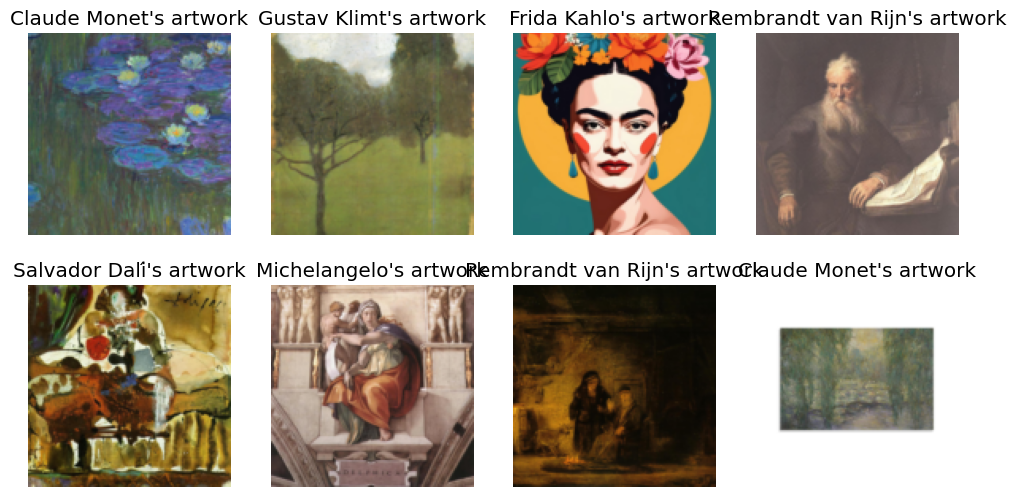

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

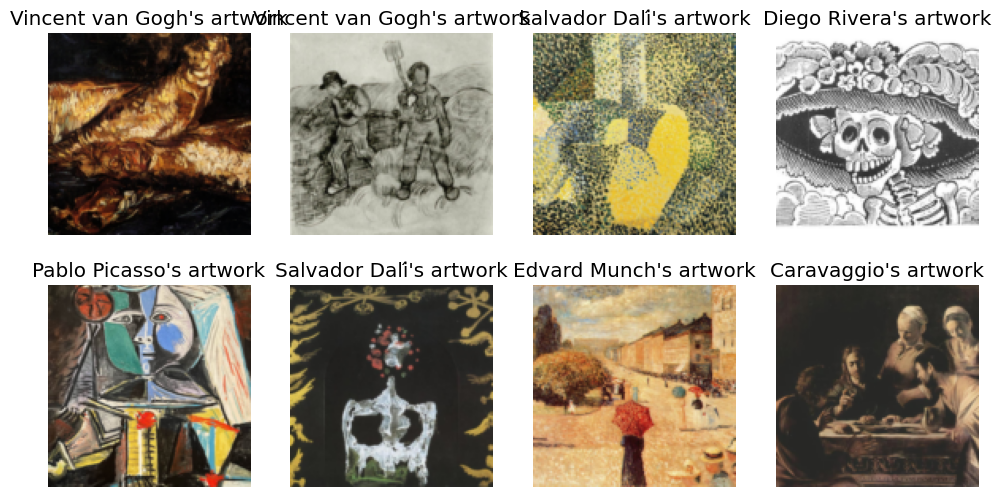

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

In [ ]:
data_path = "data"
dls = dblock.dataloaders(data_path, bs=bs)

# **Data Augmentation**

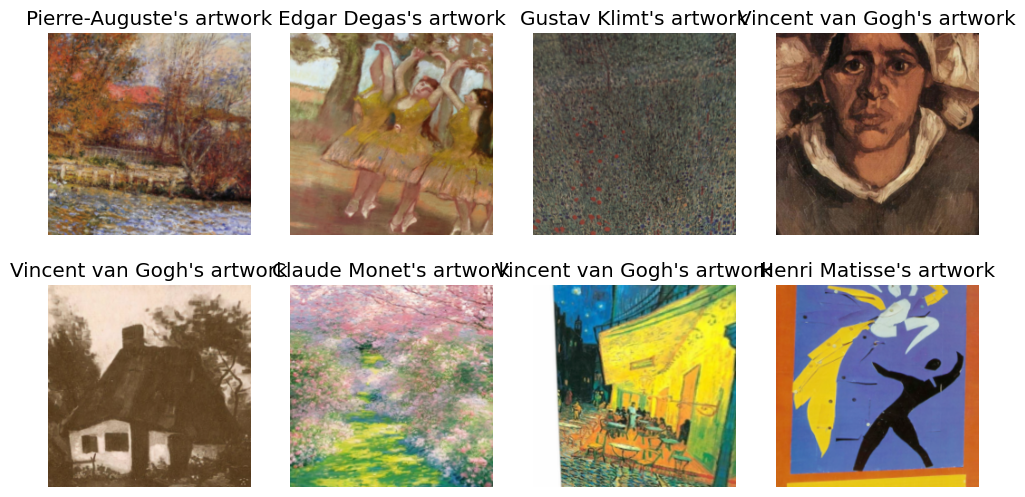

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls=dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
torch.save(dls, "dataloaders/art_dataloader_v0.pkl")